# Présentation Plotly

In [1]:
#pip install plotly
#conda install -c plotly plotly

#### Liens utiles :
- Site : https://plotly.com/python/
- figure reference : https://plotly.com/python/reference/index/
- API : https://plotly.com/python-api-reference/index.html
- px : https://plotly.com/python-api-reference/plotly.express.html

### Plusieurs "niveaux" dans Plotly :
Des submlodules :
- plotly.express
- plotly.graph_objects
- plotly.subplots
- plotly.figure_factory
- plotly.io

# Demo

In [2]:
import pandas as pd
import plotly.express as px

## Reproduire un exemple en ligne :
https://plotly.com/python/plotly-express/

In [3]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

**Objectif : Recréer la figure mais avec des pokemons.**
- Croiser "HP" et "Attack
- Séparer par le fait que le pokemon soit legendaire ou non

In [4]:
#charger le fichier
poke = pd.read_csv("../data/pokemon_data.csv")

In [5]:
# afficher et voir à quoi il ressemble
poke

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [6]:
# reproduire la même idée de figure mais avec nos données pokemon
fig = px.scatter(poke, x="HP", y="Attack", color="Legendary") # ici j'adapt le code pour qu'il corresponde à mes données
fig.show()

## Revenir à la toute première démo de la séance 1 :

#### Dynamique temporelle

In [7]:
# charger les données
df = pd.read_csv("../data/data_tweets.csv")

In [8]:
## Regarder les infos sur resample :
df.resample?

Signature:
df.resample(
    rule,
    axis: 'Axis' = 0,
    closed: 'str | None' = None,
    label: 'str | None' = None,
    convention: 'str' = 'start',
    kind: 'str | None' = None,
    on: 'Level' = None,
    level: 'Level' = None,
    origin: 'str | TimestampConvertibleTypes' = 'start_day',
    offset: 'TimedeltaConvertibleTypes | None' = None,
    group_keys: 'bool' = False,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
series/index to the ``on``/``level`` keyword parameter.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conversion.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Which axis to use for up- or down-sampling. For `Series` this parameter
    is unused and defaults to 

In [9]:
# le souci c'est que la date n'est pas un datetime :
# type O pour Object
df["date"].dtype

dtype('O')

In [10]:
## si on tente ça, ça foire en raison du format:
df.resample('W', on='date').size()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [11]:
# Passer la date au bon format
df['date_format'] = pd.to_datetime(df['date'])

In [12]:
df["date_format"].dtype

dtype('<M8[ns]')

In [13]:
# On peut maintenant resampler
df.resample('W', on='date_format').size()

date_format
2023-01-01     2
2023-01-08    17
2023-01-15    21
2023-01-22    44
2023-01-29    52
2023-02-05    36
2023-02-12    27
2023-02-19    25
2023-02-26    37
2023-03-05    25
2023-03-12    50
2023-03-19    33
2023-03-26    26
2023-04-02    33
2023-04-09    33
2023-04-16    41
2023-04-23    50
2023-04-30    13
2023-05-07    16
2023-05-14    27
2023-05-21    18
2023-05-28    13
2023-06-04    13
2023-06-11    34
2023-06-18    27
2023-06-25    56
2023-07-02    46
2023-07-09    43
2023-07-16    14
2023-07-23    47
2023-07-30    23
2023-08-06    44
2023-08-13    17
2023-08-20    21
2023-08-27    46
2023-09-03    56
2023-09-10    28
2023-09-17    31
2023-09-24    25
2023-10-01    36
2023-10-08    20
2023-10-15    31
2023-10-22    29
2023-10-29    20
2023-11-05    19
2023-11-12    21
2023-11-19    33
2023-11-26    37
2023-12-03    26
2023-12-10    37
2023-12-17    36
2023-12-24    17
2023-12-31    14
Freq: W-SUN, dtype: int64

In [14]:
# et on peut représenter ça graphiquement
fig = px.bar(df.resample('W', on='date_format').size()) # regrouper par semaine et comptez le nombre de tweets

fig.show() # Afficher le graphique

In [15]:
# l'help de px.bar
px.bar?

Signature:
px.bar(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    pattern_shape_sequence=None,
    pattern_shape_map=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    text_auto=False,
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a bar plot,

## Customiser

In [16]:
# soit on ajoute directement des éléments lors de la création :
fig_test = px.bar(df.resample('W', on='date_format').size(),
                  labels={'value': 'nombre de tweets', 'date': 'date'},
                  range_x=['2023-02', '2023-06'])
fig_test.show()

In [17]:
# Ou alors on peut faire un .update_layout() après la création du graphique :

# Repartir de notre première figure
# Et tenter d'améliorer le graphique
fig.update_layout(title='Nombre de tweets par semaine', # ajouter un titre
                  xaxis_title='Date', yaxis_title='Nombre de tweets', # renommer les étiquettes d'axes
                  template='plotly_white', # changer le style du graphique
                  showlegend=False) # masquer la légende

# Afficher le graphique
fig.show()

## Enregistrer
(si jamais : possible de faire une sauvegarde vite fait en haut à droite de la figure)  
(barre d'outil, l'icone d'appareil photo le plus a gauche)

### En image fixe :
Normalement nécessaire d'installer kaleido si il ne l'est pas déjà.

In [18]:
## cf. la doc :
## The kaleido package has no dependencies and can be installed using pip...

#pip install -U kaleido

## or conda.

#conda install -c conda-forge python-kaleido


In [19]:
fig.write_image("fig1.png")

Souvent le résultat brut est un peu moche :  
ajouter quelques paramètrès permet d'améliorer le rendu.
- scale (qualité de l'image)
- width
- height

In [20]:
# fig.write_image("fig2.png",
#                 width=800,
#                 height=450,
#                 scale=4
#                )

### En html :

In [21]:
fig.write_html("file.html")

Bien souvent : 
- S'inspirer d'exemples en lignes.
- puis de la génération de code avec chatGPT / github copilot

## Directement dans pandas en "backend"

<Axes: xlabel='Type 1'>

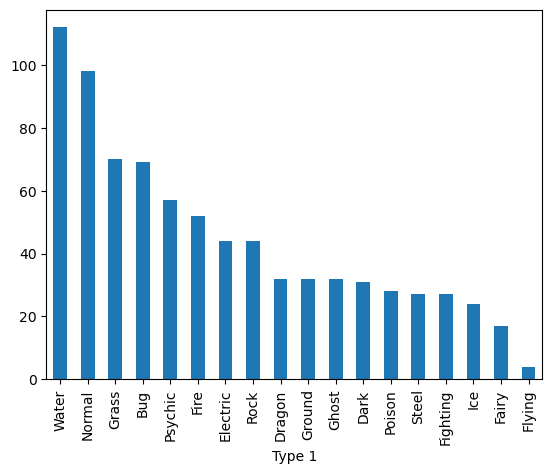

In [22]:
pd.options.plotting.backend = "matplotlib" # = de base
poke["Type 1"].value_counts().plot(kind="bar")

In [23]:
pd.options.plotting.backend = "plotly"
poke["Type 1"].value_counts().plot(kind="bar")